In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
d = pd.read_csv('//content/student-mat-pass-or-fail.csv')
d.head()

,school,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,...,higher,internet,freetime,goout,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,2,2,0,1,0,...,1,0,3,4,3,6,5,6,6,0
1,1,1,17,1,0,1,2,0,0,1,...,1,1,3,3,3,4,5,5,6,0
2,1,1,15,1,1,1,2,3,1,0,...,1,1,3,2,3,10,7,8,10,1
3,1,1,15,1,0,1,3,0,0,1,...,1,1,2,2,5,2,15,14,15,1
4,1,1,16,1,0,1,2,0,0,1,...,1,0,3,2,5,4,6,10,10,1


In [3]:
y = d['pass']
x = d.drop(['pass'], axis=1)
x

,school,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,...,nursery,higher,internet,freetime,goout,health,absences,G1,G2,G3
0,1,1,18,1,0,2,2,0,1,0,...,1,1,0,3,4,3,6,5,6,6
1,1,1,17,1,0,1,2,0,0,1,...,0,1,1,3,3,3,4,5,5,6
2,1,1,15,1,1,1,2,3,1,0,...,1,1,1,3,2,3,10,7,8,10
3,1,1,15,1,0,1,3,0,0,1,...,1,1,1,2,2,5,2,15,14,15
4,1,1,16,1,0,1,2,0,0,1,...,1,1,0,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,1,2,2,0,1,...,1,1,0,5,4,4,11,9,9,9
391,0,0,17,1,1,2,1,0,0,0,...,0,1,1,4,5,2,3,14,16,16
392,0,0,21,0,0,1,1,3,0,0,...,0,1,0,5,3,3,3,10,8,7
393,0,0,18,0,1,3,1,0,0,0,...,0,1,1,4,1,5,0,11,12,10


In [4]:
y

,pass
0,0
1,0
2,1
3,1
4,1
...,...
390,0
391,1
392,0
393,1


In [5]:
# prompt: convert all string to int in the data

for column in x.columns:
    if x[column].dtype == 'object':
        try:
            x[column] = x[column].astype(int)
        except ValueError:
            # Handle cases where conversion to int is not possible
            # e.g., replace with NaN, use a different strategy etc.
            x[column] = pd.to_numeric(x[column], errors='coerce')

In [6]:
x

,school,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,...,nursery,higher,internet,freetime,goout,health,absences,G1,G2,G3
0,1,1,18,1,0,2,2,0,1,0,...,1,1,0,3,4,3,6,5,6,6
1,1,1,17,1,0,1,2,0,0,1,...,0,1,1,3,3,3,4,5,5,6
2,1,1,15,1,1,1,2,3,1,0,...,1,1,1,3,2,3,10,7,8,10
3,1,1,15,1,0,1,3,0,0,1,...,1,1,1,2,2,5,2,15,14,15
4,1,1,16,1,0,1,2,0,0,1,...,1,1,0,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,1,2,2,0,1,...,1,1,0,5,4,4,11,9,9,9
391,0,0,17,1,1,2,1,0,0,0,...,0,1,1,4,5,2,3,14,16,16
392,0,0,21,0,0,1,1,3,0,0,...,0,1,0,5,3,3,3,10,8,7
393,0,0,18,0,1,3,1,0,0,0,...,0,1,1,4,1,5,0,11,12,10


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Features:", x_train)
print("Training Target:", y_train)
print("Testing Features:", x_test)
print("Testing Target:", y_test)

Training Features:      school  sex  age  address  famsize  traveltime  studytime  failures  \
181       1    0   16        1        0           1          2         0   
194       1    0   16        1        0           2          1         0   
173       1    1   16        1        0           1          2         3   
63        1    1   16        1        0           1          3         0   
253       1    0   16        0        0           2          1         0   
..      ...  ...  ...      ...      ...         ...        ...       ...   
71        1    0   15        1        0           1          4         0   
106       1    1   15        1        0           1          4         0   
270       1    1   19        1        0           1          2         2   
348       1    1   17        1        0           1          3         0   
102       1    0   15        1        0           1          1         0   

     schoolsup  famsup  ...  nursery  higher  internet  freetime  go

In [8]:
# prompt: convert all nan to 0

x = x.fillna(0)

In [9]:
x_min = x_train.min()
x_max = x_train.max()
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min)
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
x_train
#normalisation and nan

,school,sex,age,address,famsize,traveltime,studytime,failures,schoolsup,famsup,...,nursery,higher,internet,freetime,goout,health,absences,G1,G2,G3
181,1.0,0.0,0.142857,1.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,...,1.0,1.0,1.0,0.25,0.50,0.50,0.026667,0.500000,0.684211,0.60
194,1.0,0.0,0.142857,1.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,...,1.0,1.0,1.0,0.50,0.50,0.50,0.000000,0.571429,0.736842,0.70
173,1.0,1.0,0.142857,1.0,0.0,0.000000,0.333333,1.000000,0.0,0.0,...,0.0,1.0,1.0,0.50,1.00,0.50,0.000000,0.214286,0.368421,0.00
63,1.0,1.0,0.142857,1.0,0.0,0.000000,0.666667,0.000000,1.0,1.0,...,1.0,1.0,1.0,0.75,0.75,0.75,0.026667,0.357143,0.473684,0.45
253,1.0,0.0,0.142857,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.50,0.25,0.50,0.000000,0.214286,0.473684,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.0,0.000000,1.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,1.0,1.0,1.0,0.50,0.50,0.50,0.000000,0.357143,0.526316,0.50
106,1.0,1.0,0.000000,1.0,0.0,0.000000,1.000000,0.000000,1.0,1.0,...,1.0,1.0,1.0,0.00,0.25,0.50,0.106667,0.142857,0.421053,0.40
270,1.0,1.0,0.571429,1.0,0.0,0.000000,0.333333,0.666667,0.0,1.0,...,1.0,1.0,1.0,0.50,1.00,1.00,0.200000,0.285714,0.473684,0.45
348,1.0,1.0,0.285714,1.0,0.0,0.000000,0.666667,0.000000,0.0,1.0,...,1.0,1.0,1.0,0.75,0.50,0.75,0.000000,0.571429,0.789474,0.75


In [10]:
#svm
svm_model = SVC()
test_sizes = [0.1176, 0.1180, 0.1178, 0.1179]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
   svm_model.fit(x_train, y_train)
   svm_predictions = svm_model.predict(x_test)
   svm_accuracy = accuracy_score(y_test, svm_predictions)
   svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
   svm_classification_report = classification_report(y_test, svm_predictions)
   print(f"Accuracy with test size {test_size}: {svm_accuracy}")
   print("SVM Confusion Matrix:\n", svm_confusion_matrix)
   print("SVM Classification Report:\n", svm_classification_report)

Accuracy with test size 0.1176: 0.9574468085106383
SVM Confusion Matrix:
 [[15  2]
 [ 0 30]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.94      1.00      0.97        30

    accuracy                           0.96        47
   macro avg       0.97      0.94      0.95        47
weighted avg       0.96      0.96      0.96        47

Accuracy with test size 0.118: 0.9574468085106383
SVM Confusion Matrix:
 [[15  2]
 [ 0 30]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.94      1.00      0.97        30

    accuracy                           0.96        47
   macro avg       0.97      0.94      0.95        47
weighted avg       0.96      0.96      0.96        47

Accuracy with test size 0.1178: 0.9574468085106383
SVM Confusion Matrix:
 [[15  2]
 [ 0 30]]
SVM Classifi

In [11]:
#logistic regression
logreg = LogisticRegression()
test_sizes = [0.159, 0.27, 0.3679, 0.4215]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=69)
   x_train.fillna(0, inplace=True)
   x_test.fillna(0, inplace=True)
   logreg.fit(x_train, y_train)
   logreg_predictions = logreg.predict(x_test)
   logreg_accuracy = accuracy_score(y_test, logreg_predictions)
   logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
   logreg_classification_report = classification_report(y_test, logreg_predictions)
   print(f"Accuracy with test size {test_size}: {logreg_accuracy}")
   print("Logistic Regression Confusion Matrix:\n", logreg_confusion_matrix)
   print("Logistic regression Classification Report:\n", logreg_classification_report)

Accuracy with test size 0.159: 1.0
Logistic Regression Confusion Matrix:
 [[23  0]
 [ 0 40]]
Logistic regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        40

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

Accuracy with test size 0.27: 1.0
Logistic Regression Confusion Matrix:
 [[38  0]
 [ 0 69]]
Logistic regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        69

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107

Accuracy with test size 0.3679: 1.0
Logistic Regression Confusion Matrix:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [12]:
perceptron = Perceptron(max_iter=1999)
test_sizes = [0.57, 0.78, 0.92, 0.84]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=59)
   x_train.fillna(0, inplace=True)
   x_test.fillna(0, inplace=True)
   perceptron.fit(x_train, y_train)
   perceptron_predictions = perceptron.predict(x_test)
   perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
   perceptron_confusion_matrix = confusion_matrix(y_test, perceptron_predictions)
   perceptron_classification_report = classification_report(y_test, perceptron_predictions)
   print(f"Accuracy with test size {test_size}: {perceptron_accuracy}")
   print("Perceptron Confusion Matrix:\n", perceptron_confusion_matrix)
   print("Perceptron Classification Report:\n", perceptron_classification_report)

Accuracy with test size 0.57: 0.9380530973451328
Perceptron Confusion Matrix:
 [[ 66   5]
 [  9 146]]
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        71
           1       0.97      0.94      0.95       155

    accuracy                           0.94       226
   macro avg       0.92      0.94      0.93       226
weighted avg       0.94      0.94      0.94       226

Accuracy with test size 0.78: 0.8414239482200647
Perceptron Confusion Matrix:
 [[ 50  49]
 [  0 210]]
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.67        99
           1       0.81      1.00      0.90       210

    accuracy                           0.84       309
   macro avg       0.91      0.75      0.78       309
weighted avg       0.87      0.84      0.82       309

Accuracy with test size 0.92: 0.9175824175824175
Perceptron Confusion Ma

In [13]:
# so, svm is best fit
#logistic overfit
#perceptron underfit


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
test_sizes = [0.57, 0.78, 0.92, 0.84]

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=59)
    x_train.fillna(0, inplace=True)  # Handle NaN values if any
    x_test.fillna(0, inplace=True)

    knn_classifier.fit(x_train, y_train)
    knn_predictions = knn_classifier.predict(x_test)

    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
    knn_classification_report = classification_report(y_test, knn_predictions)

    print(f"Accuracy with test size {test_size}: {knn_accuracy}")
    print("KNN Confusion Matrix:\n", knn_confusion_matrix)
    print("KNN Classification Report:\n", knn_classification_report)

Accuracy with test size 0.57: 0.9601769911504425
KNN Confusion Matrix:
 [[ 64   7]
 [  2 153]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        71
           1       0.96      0.99      0.97       155

    accuracy                           0.96       226
   macro avg       0.96      0.94      0.95       226
weighted avg       0.96      0.96      0.96       226

Accuracy with test size 0.78: 0.919093851132686
KNN Confusion Matrix:
 [[ 84  15]
 [ 10 200]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        99
           1       0.93      0.95      0.94       210

    accuracy                           0.92       309
   macro avg       0.91      0.90      0.91       309
weighted avg       0.92      0.92      0.92       309

Accuracy with test size 0.92: 0.8983516483516484
KNN Confusion Matrix:
 [[107  11]
 [ 26 220]]
KNN Cl

In [15]:
# prompt: apply pca and compare accuracies before and after

from sklearn.decomposition import PCA

# Apply PCA with a desired number of components
pca = PCA(n_components=10)  # You can adjust the number of components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train and evaluate SVM with PCA
svm_model_pca = SVC()
svm_model_pca.fit(x_train_pca, y_train)
svm_predictions_pca = svm_model_pca.predict(x_test_pca)
svm_accuracy_pca = accuracy_score(y_test, svm_predictions_pca)

print("SVM Accuracy with PCA:", svm_accuracy_pca)
print("SVM Accuracy without PCA:", svm_accuracy) # Assuming svm_accuracy from previous code


# Train and evaluate Logistic Regression with PCA
logreg_pca = LogisticRegression()
logreg_pca.fit(x_train_pca, y_train)
logreg_predictions_pca = logreg_pca.predict(x_test_pca)
logreg_accuracy_pca = accuracy_score(y_test, logreg_predictions_pca)

print("Logistic Regression Accuracy with PCA:", logreg_accuracy_pca)
# Assuming logreg_accuracy from previous code
print("Logistic Regression Accuracy without PCA:", logreg_accuracy)


# Train and evaluate Perceptron with PCA
perceptron_pca = Perceptron(max_iter=1999)
perceptron_pca.fit(x_train_pca, y_train)
perceptron_predictions_pca = perceptron_pca.predict(x_test_pca)
perceptron_accuracy_pca = accuracy_score(y_test, perceptron_predictions_pca)

print("Perceptron Accuracy with PCA:", perceptron_accuracy_pca)
print("Perceptron Accuracy without PCA:", perceptron_accuracy) # Assuming perceptron_accuracy


# Train and evaluate KNN with PCA
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca.fit(x_train_pca, y_train)
knn_predictions_pca = knn_classifier_pca.predict(x_test_pca)
knn_accuracy_pca = accuracy_score(y_test, knn_predictions_pca)

print("KNN Accuracy with PCA:", knn_accuracy_pca)
print("KNN Accuracy without PCA:", knn_accuracy)

SVM Accuracy with PCA: 0.9186746987951807
SVM Accuracy without PCA: 0.9574468085106383
Logistic Regression Accuracy with PCA: 0.9457831325301205
Logistic Regression Accuracy without PCA: 0.9940119760479041
Perceptron Accuracy with PCA: 0.9457831325301205
Perceptron Accuracy without PCA: 0.9487951807228916
KNN Accuracy with PCA: 0.8855421686746988
KNN Accuracy without PCA: 0.891566265060241


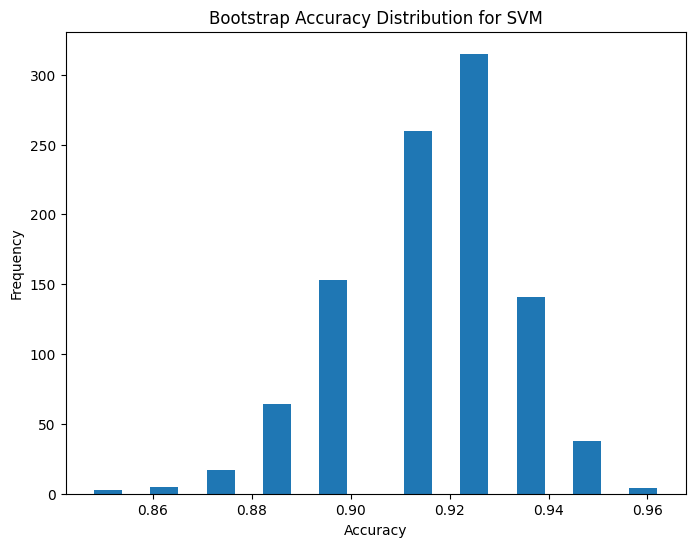

SVM Bootstrap Accuracy Scores:
Mean Accuracy: 0.9159493670886073
Standard Deviation: 0.017320970615794764
------------------------------


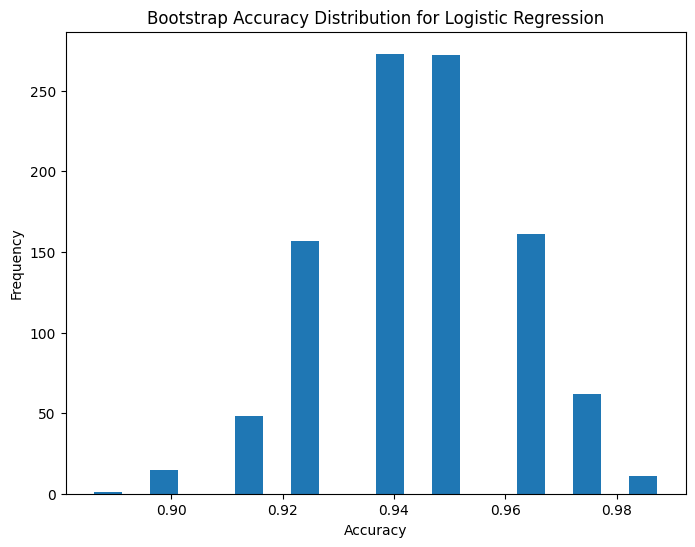

Logistic Regression Bootstrap Accuracy Scores:
Mean Accuracy: 0.9433164556962024
Standard Deviation: 0.017344617709809548
------------------------------


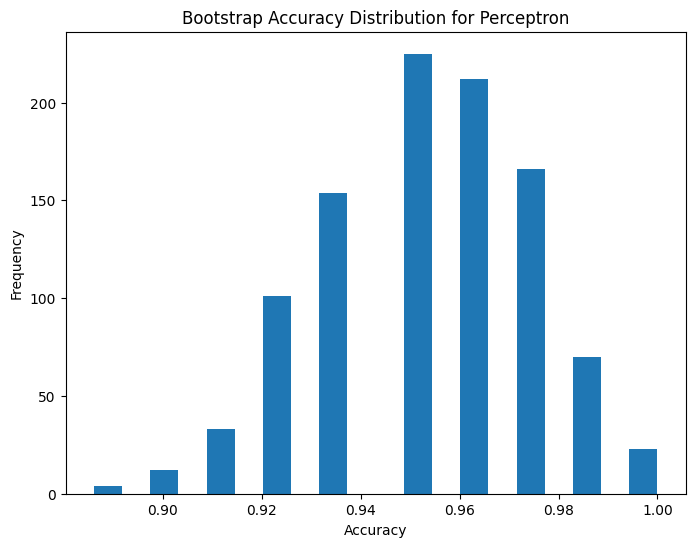

Perceptron Bootstrap Accuracy Scores:
Mean Accuracy: 0.9534556962025315
Standard Deviation: 0.021618055649741227
------------------------------


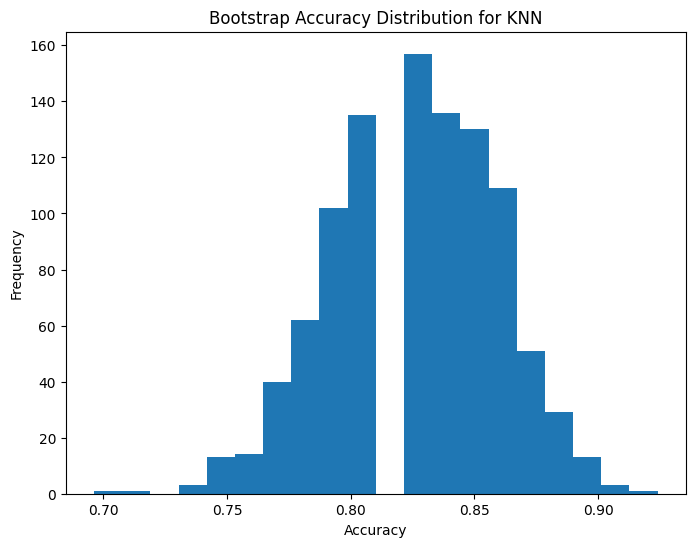

KNN Bootstrap Accuracy Scores:
Mean Accuracy: 0.8266582278481013
Standard Deviation: 0.032643417306994826
------------------------------


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Add this import statement at the beginning of your script
from sklearn.preprocessing import StandardScaler

# Function to create bootstrap samples:
def create_bootstrap_samples(data, num_samples=1000):
    bootstrap_samples = []
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(len(data), len(data), replace=True)
        bootstrap_sample = data.iloc[bootstrap_indices]
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

# Function to train and evaluate a model with bootstrapping:
def evaluate_model_with_bootstrap(model, x_train, y_train, num_samples=1000):  # Assuming x_train, y_train are already scaled
    accuracy_scores = []
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(len(x_train), len(x_train), replace=True)
        x_boot, y_boot = x_train[bootstrap_indices], y_train.iloc[bootstrap_indices]
        model.fit(x_boot, y_boot)
        predictions_boot = model.predict(x_test)  # Evaluate with x_test
        accuracy_scores.append(accuracy_score(y_test, predictions_boot))
    return accuracy_scores

# Combine features and target for bootstrapping
data = pd.concat([x, y], axis=1)

# Assuming you have your models (svm_model, logreg, perceptron, knn_classifier)
# and data (x, y)
# ... (Your existing code for models and data)
models = [svm_model, logreg, perceptron, knn_classifier]
model_names = ["SVM", "Logistic Regression", "Perceptron", "KNN"]

# Split data into training and testing sets before bootstrapping
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale training data here
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Handle NaN values in x_train and x_test
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

for model, name in zip(models, model_names):
    accuracy_scores = evaluate_model_with_bootstrap(model, x_train, y_train)

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.hist(accuracy_scores, bins=20)
    plt.title(f"Bootstrap Accuracy Distribution for {name}")
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.show()

    print(f"{name} Bootstrap Accuracy Scores:")
    print(f"Mean Accuracy: {np.mean(accuracy_scores)}")
    print(f"Standard Deviation: {np.std(accuracy_scores)}")
    print("-" * 30)